# Exercise: Integrate the Bank

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Data Wrangling">Data Wrangling</a></li>
<li><a href="#EDA">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Problem Statament

BankCo is small African bank that has two data sources served by APIs. They would like you, the Integration Engineer, to write a small script that will integrate their two data sources and prepare a few CSV summaries. The two datasets are:

1. A JSON list of transactions: https://df-dev.bk.rw/interview01/transactions
2. An XML list of customers: https://df-dev.bk.rw/interview01/customers



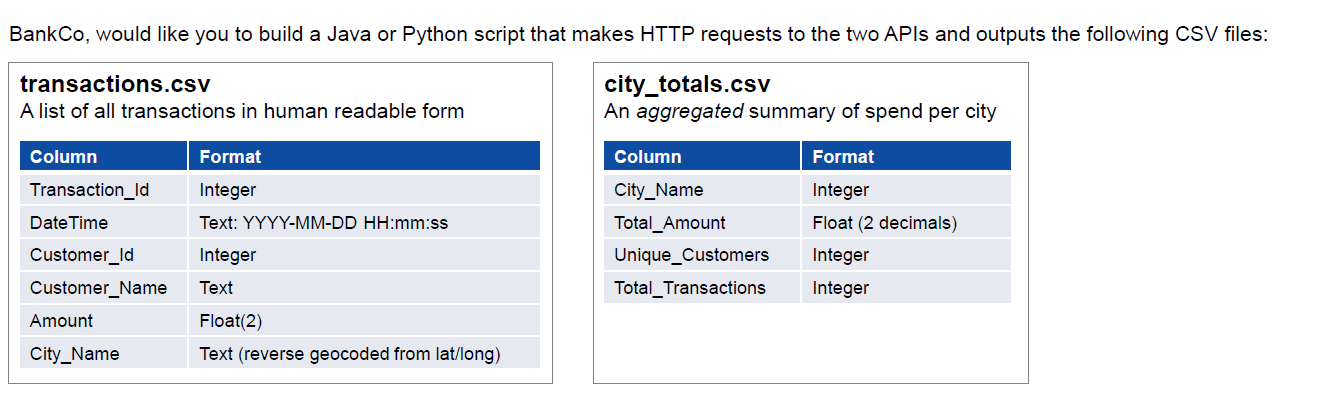

<a id='wrangling'></a>
## Data Wrangling

### General Dataset Properties 


**First, let's look what the dataset looks like before we investigate.**

In [2]:
#Install all required packages
import pandas as pd
import numpy as np
import os
import requests
from requests import session

### Data Source API

#### https://df-dev.bk.rw/interview01/customers
#### https://df-dev.bk.rw/interview01/transactions

In [3]:
#assign sources to variables

url1 = 'https://df-dev.bk.rw/interview01/customers'
url2 = 'https://df-dev.bk.rw/interview01/transactions'

In [4]:
#using the requests package to pull data into pandas

result1 = requests.get(url1)
results2 = requests.get(url2)

In [305]:
#check for successfull completion - 200 code indicates success
result1.status_code

200

In [6]:
#check for successfull completion - 200 code indicates success
results2.status_code

200

In [237]:
#Checking memory Usage
def mem_mib(df):
    print('{0:.2f} MiB'.format(
    df.memory_usage().sum() / (1024 * 1024)
    ))

In [7]:
#Checking data structure - XML

# content text/xml
result1.headers

{'Server': 'nginx/1.15.3', 'Date': 'Mon, 19 Nov 2018 09:51:00 GMT', 'Content-Type': 'text/xml; charset=utf-8', 'Content-Length': '255', 'Connection': 'keep-alive', 'X-Powered-By': 'Express', 'ETag': 'W/"ff-wQKe16dcEp/+PNxGpWculXZpSKo"', 'Strict-Transport-Security': 'max-age=15724800; includeSubDomains'}

In [8]:
# content application / json
results2.headers

{'Server': 'nginx/1.15.3', 'Date': 'Mon, 19 Nov 2018 09:51:01 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'Express', 'ETag': 'W/"5ae-U9DO9iWDhtlnIQ/kQN/atF7octU"', 'Strict-Transport-Security': 'max-age=15724800; includeSubDomains', 'Content-Encoding': 'gzip'}

In [9]:
#exploring response object : xml
result1.text

'<customers>\n    <customer>\n        <id>1</id>\n        <name>Alice</name>\n    </customer>\n    <customer>\n        <id>2</id>\n        <name>Bob</name>\n    </customer>\n    <customer>\n        <id>3</id>\n        <name>Charlie</name>\n    </customer>\n</customers>'

In [239]:
#exploring response object : json
results2.json()


[{'customerId': 1,
  'timestamp': 1539767520453,
  'amount': 5612.32,
  'latitude': -1.970579,
  'longitude': 30.104429},
 {'customerId': 1,
  'timestamp': 1539767722039,
  'amount': 2001,
  'latitude': -1.970579,
  'longitude': 30.104429},
 {'customerId': 1,
  'timestamp': 1539767723735,
  'amount': 1987.11,
  'latitude': -1.970579,
  'longitude': 30.104429},
 {'customerId': 1,
  'timestamp': 1539767724559,
  'amount': 9888.99,
  'latitude': -1.970579,
  'longitude': 30.104429},
 {'customerId': 2,
  'timestamp': 1539767829151,
  'amount': 324234.99,
  'latitude': -1.292066,
  'longitude': 36.821945},
 {'customerId': 2,
  'timestamp': 1539767830247,
  'amount': 12224.99,
  'latitude': -1.292066,
  'longitude': 36.821945},
 {'customerId': 2,
  'timestamp': 1539767830951,
  'amount': 99221.22,
  'latitude': -1.292066,
  'longitude': 36.821945},
 {'customerId': 2,
  'timestamp': 1539767830951,
  'amount': 99221.22,
  'latitude': -1.292066,
  'longitude': 36.821945},
 {'customerId': 2,
  '

In [11]:
# import package to parse XML
import xml.etree.ElementTree as ET

In [12]:
cust_data = ET.parse('customers.xml')

In [13]:
root = cust_data.getroot()

In [14]:
root.tag

'customers'

In [15]:
all_customers = root.findall('customer')

In [17]:
#xml has three levels
len(all_customers)

3

In [18]:
cust_data.findall('customer')

[<Element 'customer' at 0x0000017BC3EE5C28>,
 <Element 'customer' at 0x0000017BC3EE5D18>,
 <Element 'customer' at 0x0000017BC3EE5E08>]

In [19]:
type(cust_data)

xml.etree.ElementTree.ElementTree

In [20]:
bk_xml = result1.text

In [21]:
print(bk_xml)

<customers>
    <customer>
        <id>1</id>
        <name>Alice</name>
    </customer>
    <customer>
        <id>2</id>
        <name>Bob</name>
    </customer>
    <customer>
        <id>3</id>
        <name>Charlie</name>
    </customer>
</customers>


## Saving XML and JSON data source to CSV file

In [22]:
#open a file for writing XML to CSV file creation
local_data = open('Customer_data.csv', 'w')

In [24]:
#create csv writer object
import csv,json
csvwrt = csv.writer(local_data)
customer_head = []

In [25]:
count = 0
for customer in root.findall('customer'):
    bk_output = []
   # bk_id = []
    if count == 0:
        Id = customer.find('id').tag
        customer_head.append(Id)
        Name = customer.find('name').tag
        customer_head.append(Name)
        csvwrt.writerow(customer_head)
        count = count + 1
        
    Id = customer.find('id').text
    bk_output.append(Id)
    Name = customer.find('name').text
    bk_output.append(Name)
    csvwrt.writerow(bk_output)
local_data.close()

In [26]:
#confirm json format
results2.json

<bound method Response.json of <Response [200]>>

In [27]:
#assign varible to json source
txn_data = results2.json()

In [29]:
#open a file for writing
local_json = open('Transaction_data.json', 'w')
#local_json.close()

In [193]:
#convert json data to data frame - transaction data
json_data = pd.read_json(url2)

In [31]:
json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
amount        14 non-null float64
customerId    14 non-null int64
latitude      14 non-null float64
longitude     14 non-null float64
timestamp     14 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 640.0 bytes


In [32]:
#convert customer csv data to data frame - customer data
bk_customer_data = pd.read_csv('Customer_data.csv')

In [33]:
bk_customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
id      3 non-null int64
name    3 non-null object
dtypes: int64(1), object(1)
memory usage: 128.0+ bytes


## XML and JSON Data sources saved to CSV and passed to Data Frame

In [34]:

bk_customer_data

,id,name
0,1,Alice
1,2,Bob
2,3,Charlie


In [194]:
json_data

,amount,customerId,latitude,longitude,timestamp
0,5.612320e+03,1,-1.970579,30.104429,2018-10-17 09:12:00.453
1,2.001000e+03,1,-1.970579,30.104429,2018-10-17 09:15:22.039
2,1.987110e+03,1,-1.970579,30.104429,2018-10-17 09:15:23.735
3,9.888990e+03,1,-1.970579,30.104429,2018-10-17 09:15:24.559
4,3.242350e+05,2,-1.292066,36.821945,2018-10-17 09:17:09.151
5,1.222499e+04,2,-1.292066,36.821945,2018-10-17 09:17:10.247
6,9.922122e+04,2,-1.292066,36.821945,2018-10-17 09:17:10.951
7,9.922122e+04,2,-1.292066,36.821945,2018-10-17 09:17:10.951
8,9.922122e+04,2,-1.292066,36.821945,2018-10-17 09:17:10.951
9,1.221110e+03,3,-26.204103,28.047304,2018-10-17 09:18:25.080


## Testing Gecoding for Reverse latitude and longitude

In [36]:
#import packages for gecoding
import geocoder as ge

In [38]:
#gecoding API
from geopy.geocoders import Nominatim

In [40]:
#gecoding API - alternative
from pygeocoder import Geocoder

In [41]:
result = Geocoder(api_key='AIzaSyDEbLQtR5D6xRtZOAooK5pC-********').reverse_geocode(-1.970579,30.104429)

In [42]:
#print result of reverse geocoding
print(result)

Kisementi, Kigali, Rwanda


In [43]:
#test number 2
result = Geocoder(api_key='AIzaSyDEbLQtR5D6xRtZOAooK5pC-********').reverse_geocode(-26.204103,28.047304)

In [44]:
print(result)

Johannesburg CBD Bus Stop, Von Wielligh St, Johannesburg, 2000, South Africa


### Iterate over latitiude and longitude values

In [45]:
# filter out other data columns

city_name = pd.read_csv('coordinates table.csv')

In [46]:
city_cord = city_name[['latitude','longitude']]

In [47]:
list(city_cord)

['latitude', 'longitude']

In [48]:
city_cord

,latitude,longitude
0,-1.970579,30.104429
1,-1.970579,30.104429
2,-1.970579,30.104429
3,-1.970579,30.104429
4,-1.292066,36.821945
5,-1.292066,36.821945
6,-1.292066,36.821945
7,-1.292066,36.821945
8,-1.292066,36.821945
9,-26.204103,28.047304


In [67]:
city_crod2 = pd.read_csv('city_cord.csv',index_col=0)

In [69]:
city_crod2.reset_index

<bound method DataFrame.reset_index of             city_cord
-1.970579   30.104429
-1.970579   30.104429
-1.970579   30.104429
-1.970579   30.104429
-1.292066   36.821945
-1.292066   36.821945
-1.292066   36.821945
-1.292066   36.821945
-1.292066   36.821945
-26.204103  28.047304
-26.204103  28.047304
-26.204103  28.047304
-26.204103  28.047304
-26.204103  28.047304>

In [70]:
city_crod2

,city_cord
-1.970579,30.104429
-1.970579,30.104429
-1.970579,30.104429
-1.970579,30.104429
-1.292066,36.821945
-1.292066,36.821945
-1.292066,36.821945
-1.292066,36.821945
-1.292066,36.821945
-26.204103,28.047304


pandas.core.frame.DataFrame

In [162]:
test = city_cord.loc[0:14,'latitude' : 'longitude']


In [163]:
test

,latitude,longitude
0,-1.970579,30.104429
1,-1.970579,30.104429
2,-1.970579,30.104429
3,-1.970579,30.104429
4,-1.292066,36.821945
5,-1.292066,36.821945
6,-1.292066,36.821945
7,-1.292066,36.821945
8,-1.292066,36.821945
9,-26.204103,28.047304


In [112]:
lat = test.latitude.apply(float)

In [133]:
lng = test.longitude.apply(float)

### Check for Unique coordinate Values

In [135]:
city_crod2_new = pd.read_csv('coordinates table.csv',index_col=0)

for index,row in city_crod2_new.iterrows():
    r = print(index, row['latitude'], row['longitude'])
  
  

0 -1.970579 30.104429
1 -1.970579 30.104429
2 -1.970579 30.104429
3 -1.970579 30.104429
4 -1.292066 36.821945
5 -1.292066 36.821945
6 -1.292066 36.821945
7 -1.292066 36.821945
8 -1.292066 36.821945
9 -26.204103 28.047303999999997
10 -26.204103 28.047303999999997
11 -26.204103 28.047303999999997
12 -26.204103 28.047303999999997
13 -26.204103 28.047303999999997


In [142]:
result0 = Geocoder(api_key='AIzaSyDEbLQtR5D6xRtZOAoo***********').reverse_geocode(-1.970579 ,30.104429)
print(result0)
result4 =  Geocoder(api_key='AIzaSyDEbLQtR5D6xRtZOAooK5pC-********').reverse_geocode(-1.292066 ,36.821945)
print(result4)
result5 =  Geocoder(api_key='AIzaSyDEbLQtR5D6xRtZOAooK5pC-**********').reverse_geocode(-26.204103, 28.047303999999997)
print(result5)



Kisementi, Kigali, Rwanda
Thika Superhighway,Mountain Mall,2nd Floor,Suite C18, Nairobi, Kenya
Johannesburg CBD Bus Stop, Von Wielligh St, Johannesburg, 2000, South Africa


In [143]:
type(result5)

pygeolib.GeocoderResult

### Reverse Geocoding Results

In [159]:
### Reverse Geo_coding Results
print(result0)
print(result4)
print(result5)

Kisementi, Kigali, Rwanda
Thika Superhighway,Mountain Mall,2nd Floor,Suite C18, Nairobi, Kenya
Johannesburg CBD Bus Stop, Von Wielligh St, Johannesburg, 2000, South Africa


In [ ]:
result0.formatted_address()

In [167]:
test = pd.DataFrame({'City_Name': ['Kisementi, Kigali, Rwanda', 'Thika Superhighway,Mountain Mall,2nd Floor,Suite C18, Nairobi, Kenya', 'Johannesburg CBD Bus Stop, Von Wielligh St, Johannesburg, 2000, South Africa']})
#test['City_Name'] = test[['latitude', 'longitude']].apply(lambda x: ''.join(x), axis=None)

In [466]:
test

,City_Name
0,"Kisementi, Kigali, Rwanda"
1,"Thika Superhighway,Mountain Mall,2nd Floor,Sui..."
2,"Johannesburg CBD Bus Stop, Von Wielligh St, Jo..."


In [186]:
type(test)

pandas.core.frame.DataFrame

In [221]:
test.to_csv(os.path.join('transaction.csv'))

In [222]:
json_data

,amount,customerId,latitude,longitude,timestamp
0,5.612320e+03,1,-1.970579,30.104429,2018-10-17 09:12:00.453
1,2.001000e+03,1,-1.970579,30.104429,2018-10-17 09:15:22.039
2,1.987110e+03,1,-1.970579,30.104429,2018-10-17 09:15:23.735
3,9.888990e+03,1,-1.970579,30.104429,2018-10-17 09:15:24.559
4,3.242350e+05,2,-1.292066,36.821945,2018-10-17 09:17:09.151
5,1.222499e+04,2,-1.292066,36.821945,2018-10-17 09:17:10.247
6,9.922122e+04,2,-1.292066,36.821945,2018-10-17 09:17:10.951
7,9.922122e+04,2,-1.292066,36.821945,2018-10-17 09:17:10.951
8,9.922122e+04,2,-1.292066,36.821945,2018-10-17 09:17:10.951
9,1.221110e+03,3,-26.204103,28.047304,2018-10-17 09:18:25.080


## Creating the transcation and city totals summaries

In [198]:
#import packages 
import os # for file paths
import pandas as pd
from pandas import isnull

In [199]:
#view master file
json_data.head

<bound method NDFrame.head of           amount  customerId   latitude  longitude               timestamp
0   5.612320e+03           1  -1.970579  30.104429 2018-10-17 09:12:00.453
1   2.001000e+03           1  -1.970579  30.104429 2018-10-17 09:15:22.039
2   1.987110e+03           1  -1.970579  30.104429 2018-10-17 09:15:23.735
3   9.888990e+03           1  -1.970579  30.104429 2018-10-17 09:15:24.559
4   3.242350e+05           2  -1.292066  36.821945 2018-10-17 09:17:09.151
5   1.222499e+04           2  -1.292066  36.821945 2018-10-17 09:17:10.247
6   9.922122e+04           2  -1.292066  36.821945 2018-10-17 09:17:10.951
7   9.922122e+04           2  -1.292066  36.821945 2018-10-17 09:17:10.951
8   9.922122e+04           2  -1.292066  36.821945 2018-10-17 09:17:10.951
9   1.221110e+03           3 -26.204103  28.047304 2018-10-17 09:18:25.080
10  9.871100e+04           3 -26.204103  28.047304 2018-10-17 09:18:25.801
11  2.100120e+09           3 -26.204103  28.047304 2018-10-17 09:18:26

In [202]:
json_data.head(1)

,amount,customerId,latitude,longitude,timestamp
0,5612.32,1,-1.970579,30.104429,2018-10-17 09:12:00.453


In [203]:
#remove columns for longitude and latitude

json_copy = json_data.copy() #making copy of master file


In [212]:
json_copy.columns

Index(['amount', 'customerId', 'latitude', 'longitude', 'timestamp'], dtype='object')

In [217]:
json_copy.drop(['latitude', 'longitude'], axis=1, inplace=True)

In [218]:
#some formatting to meet summaries requirement
json_copy.rename(columns={'amount': 'Amount', 'timestamp': 'DateTime'}, inplace=True)

In [219]:
json_copy

,Amount,customerId,DateTime
0,5.612320e+03,1,2018-10-17 09:12:00.453
1,2.001000e+03,1,2018-10-17 09:15:22.039
2,1.987110e+03,1,2018-10-17 09:15:23.735
3,9.888990e+03,1,2018-10-17 09:15:24.559
4,3.242350e+05,2,2018-10-17 09:17:09.151
5,1.222499e+04,2,2018-10-17 09:17:10.247
6,9.922122e+04,2,2018-10-17 09:17:10.951
7,9.922122e+04,2,2018-10-17 09:17:10.951
8,9.922122e+04,2,2018-10-17 09:17:10.951
9,1.221110e+03,3,2018-10-17 09:18:25.080


In [220]:
json_copy.to_csv(os.path.join('transaction.csv'))

In [223]:
json_copy.head(3)

,Amount,customerId,DateTime
0,5612.32,1,2018-10-17 09:12:00.453
1,2001.00,1,2018-10-17 09:15:22.039
2,1987.11,1,2018-10-17 09:15:23.735


In [224]:
bk_customer_data.head(2)

,id,name
0,1,Alice
1,2,Bob


In [225]:
#Joining Tables  - three datafromaes to work with json_data, bk_customer_data and locale 
locale = pd.read_csv('TRANSACTION2018.csv')


In [232]:
locale.head(2)

,City_Name
Transction Id,
0,"Kisementi, Kigali, Rwanda"
1,"Thika Superhighway,Mountain Mall,2nd Floor,Sui..."


In [231]:
locale.set_index('Transction Id',inplace=True)

In [229]:
locale.rename(columns={'Unnamed: 0': 'Transction Id'}, inplace=True)

In [233]:

bk_customer_data

,id,name
0,1,Alice
1,2,Bob
2,3,Charlie


In [234]:

locale.head()

,City_Name
Transction Id,
0,"Kisementi, Kigali, Rwanda"
1,"Thika Superhighway,Mountain Mall,2nd Floor,Sui..."
2,"Johannesburg CBD Bus Stop, Von Wielligh St, Jo..."


In [236]:
json_copy.head(2)

,Amount,customerId,DateTime
0,5612.32,1,2018-10-17 09:12:00.453
1,2001.00,1,2018-10-17 09:15:22.039


In [241]:
mem_mib(json_copy)

0.00 MiB


In [329]:
#Joining Tables  - three datafromaes to work with json_data, bk_customer_data and locale 
whodis = pd.merge(bk_customer_data,json_copy,  left_index=True, right_on='customerId')

In [330]:
pd.merge(bk_customer_data,  json_copy.set_index('customerId',drop=False),
        left_index=True, right_index=True)

,id,name,Amount,customerId,DateTime
1,2,Bob,5612.32,1,2018-10-17 09:12:00.453
1,2,Bob,2001.00,1,2018-10-17 09:15:22.039
1,2,Bob,1987.11,1,2018-10-17 09:15:23.735
1,2,Bob,9888.99,1,2018-10-17 09:15:24.559
2,3,Charlie,324234.99,2,2018-10-17 09:17:09.151
2,3,Charlie,12224.99,2,2018-10-17 09:17:10.247
2,3,Charlie,99221.22,2,2018-10-17 09:17:10.951
2,3,Charlie,99221.22,2,2018-10-17 09:17:10.951
2,3,Charlie,99221.22,2,2018-10-17 09:17:10.951


In [262]:
locale.City_Name

Transction Id
0                            Kisementi, Kigali, Rwanda
1    Thika Superhighway,Mountain Mall,2nd Floor,Sui...
2    Johannesburg CBD Bus Stop, Von Wielligh St, Jo...
Name: City_Name, dtype: object

In [269]:
merged1 = pd.merge(bk_customer_data, json_copy, left_index=True,
                 right_on='customerId', how='left', indicator=True)
merged1

,id,name,Amount,customerId,DateTime,_merge
13,1,Alice,NaN,0,NaT,left_only
0,2,Bob,5612.32,1,2018-10-17 09:12:00.453,both
1,2,Bob,2001.00,1,2018-10-17 09:15:22.039,both
2,2,Bob,1987.11,1,2018-10-17 09:15:23.735,both
3,2,Bob,9888.99,1,2018-10-17 09:15:24.559,both
4,3,Charlie,324234.99,2,2018-10-17 09:17:09.151,both
5,3,Charlie,12224.99,2,2018-10-17 09:17:10.247,both
6,3,Charlie,99221.22,2,2018-10-17 09:17:10.951,both
7,3,Charlie,99221.22,2,2018-10-17 09:17:10.951,both
8,3,Charlie,99221.22,2,2018-10-17 09:17:10.951,both


In [266]:
merged2 = pd.merge(bk_customer_data, json_copy, left_index=True,
                 right_on='customerId', how='right', indicator=True)
merged2

,id,name,Amount,customerId,DateTime,_merge
0,2.0,Bob,5.612320e+03,1,2018-10-17 09:12:00.453,both
1,2.0,Bob,2.001000e+03,1,2018-10-17 09:15:22.039,both
2,2.0,Bob,1.987110e+03,1,2018-10-17 09:15:23.735,both
3,2.0,Bob,9.888990e+03,1,2018-10-17 09:15:24.559,both
4,3.0,Charlie,3.242350e+05,2,2018-10-17 09:17:09.151,both
5,3.0,Charlie,1.222499e+04,2,2018-10-17 09:17:10.247,both
6,3.0,Charlie,9.922122e+04,2,2018-10-17 09:17:10.951,both
7,3.0,Charlie,9.922122e+04,2,2018-10-17 09:17:10.951,both
8,3.0,Charlie,9.922122e+04,2,2018-10-17 09:17:10.951,both
9,NaN,NaN,1.221110e+03,3,2018-10-17 09:18:25.080,right_only


In [267]:
merged3 = pd.merge(bk_customer_data, json_copy, left_index=True,
                 right_on='customerId', how='outer', indicator=True)
merged3

,id,name,Amount,customerId,DateTime,_merge
13,1.0,Alice,NaN,0,NaT,left_only
0,2.0,Bob,5.612320e+03,1,2018-10-17 09:12:00.453,both
1,2.0,Bob,2.001000e+03,1,2018-10-17 09:15:22.039,both
2,2.0,Bob,1.987110e+03,1,2018-10-17 09:15:23.735,both
3,2.0,Bob,9.888990e+03,1,2018-10-17 09:15:24.559,both
4,3.0,Charlie,3.242350e+05,2,2018-10-17 09:17:09.151,both
5,3.0,Charlie,1.222499e+04,2,2018-10-17 09:17:10.247,both
6,3.0,Charlie,9.922122e+04,2,2018-10-17 09:17:10.951,both
7,3.0,Charlie,9.922122e+04,2,2018-10-17 09:17:10.951,both
8,3.0,Charlie,9.922122e+04,2,2018-10-17 09:17:10.951,both


In [272]:
merged1.Amount.sum()

653613.0599999999

In [273]:
merged1.name.value_counts

<bound method IndexOpsMixin.value_counts of 13      Alice
0         Bob
1         Bob
2         Bob
3         Bob
4     Charlie
5     Charlie
6     Charlie
7     Charlie
8     Charlie
Name: name, dtype: object>

In [275]:
#check join conditions
pd.merge(bk_customer_data, json_copy,
        left_index=True, right_on='customerId',
        validate='1:m')

,id,name,Amount,customerId,DateTime
0,2,Bob,5612.32,1,2018-10-17 09:12:00.453
1,2,Bob,2001.00,1,2018-10-17 09:15:22.039
2,2,Bob,1987.11,1,2018-10-17 09:15:23.735
3,2,Bob,9888.99,1,2018-10-17 09:15:24.559
4,3,Charlie,324234.99,2,2018-10-17 09:17:09.151
5,3,Charlie,12224.99,2,2018-10-17 09:17:10.247
6,3,Charlie,99221.22,2,2018-10-17 09:17:10.951
7,3,Charlie,99221.22,2,2018-10-17 09:17:10.951
8,3,Charlie,99221.22,2,2018-10-17 09:17:10.951


In [299]:
#Location of customers
locale.join([bk_customer_data])
             

,City_Name,id,name
Transction Id,,,
0,"Kisementi, Kigali, Rwanda",1,Alice
1,"Thika Superhighway,Mountain Mall,2nd Floor,Sui...",2,Bob
2,"Johannesburg CBD Bus Stop, Von Wielligh St, Jo...",3,Charlie


In [304]:
json_copy.join([bk_customer_data, locale ])

,Amount,customerId,DateTime,id,name,City_Name
0,5.612320e+03,1,2018-10-17 09:12:00.453,1.0,Alice,"Kisementi, Kigali, Rwanda"
1,2.001000e+03,1,2018-10-17 09:15:22.039,2.0,Bob,"Thika Superhighway,Mountain Mall,2nd Floor,Sui..."
2,1.987110e+03,1,2018-10-17 09:15:23.735,3.0,Charlie,"Johannesburg CBD Bus Stop, Von Wielligh St, Jo..."
3,9.888990e+03,1,2018-10-17 09:15:24.559,NaN,NaN,NaN
4,3.242350e+05,2,2018-10-17 09:17:09.151,NaN,NaN,NaN
5,1.222499e+04,2,2018-10-17 09:17:10.247,NaN,NaN,NaN
6,9.922122e+04,2,2018-10-17 09:17:10.951,NaN,NaN,NaN
7,9.922122e+04,2,2018-10-17 09:17:10.951,NaN,NaN,NaN
8,9.922122e+04,2,2018-10-17 09:17:10.951,NaN,NaN,NaN
9,1.221110e+03,3,2018-10-17 09:18:25.080,NaN,NaN,NaN


In [306]:
json_copy.head(1
              )

,Amount,customerId,DateTime
0,5612.32,1,2018-10-17 09:12:00.453


In [307]:
json_data.head(1
              )

,amount,customerId,latitude,longitude,timestamp
0,5612.32,1,-1.970579,30.104429,2018-10-17 09:12:00.453


In [308]:
bk_customer_data.head(1)

,id,name
0,1,Alice


In [309]:
locale.head(2)

,City_Name
Transction Id,
0,"Kisementi, Kigali, Rwanda"
1,"Thika Superhighway,Mountain Mall,2nd Floor,Sui..."


In [345]:
conca_t = pd.concat([whodis,bk_customer_data, locale], ignore_index=True)

E:\Anaconda\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [344]:
conca_t

,Amount,City_Name,DateTime,customerId,id,name
0,5612.32,NaN,2018-10-17 09:12:00.453,1.0,2.0,Bob
1,2001.00,NaN,2018-10-17 09:15:22.039,1.0,2.0,Bob
2,1987.11,NaN,2018-10-17 09:15:23.735,1.0,2.0,Bob
3,9888.99,NaN,2018-10-17 09:15:24.559,1.0,2.0,Bob
4,324234.99,NaN,2018-10-17 09:17:09.151,2.0,3.0,Charlie
5,12224.99,NaN,2018-10-17 09:17:10.247,2.0,3.0,Charlie
6,99221.22,NaN,2018-10-17 09:17:10.951,2.0,3.0,Charlie
7,99221.22,NaN,2018-10-17 09:17:10.951,2.0,3.0,Charlie
8,99221.22,NaN,2018-10-17 09:17:10.951,2.0,3.0,Charlie
9,NaN,NaN,NaT,NaN,1.0,Alice


In [348]:
conca_t

,Amount,City_Name,DateTime,customerId,id,name
0,5612.32,NaN,2018-10-17 09:12:00.453,1.0,2.0,Bob
1,2001.00,NaN,2018-10-17 09:15:22.039,1.0,2.0,Bob
2,1987.11,NaN,2018-10-17 09:15:23.735,1.0,2.0,Bob
3,9888.99,NaN,2018-10-17 09:15:24.559,1.0,2.0,Bob
4,324234.99,NaN,2018-10-17 09:17:09.151,2.0,3.0,Charlie
5,12224.99,NaN,2018-10-17 09:17:10.247,2.0,3.0,Charlie
6,99221.22,NaN,2018-10-17 09:17:10.951,2.0,3.0,Charlie
7,99221.22,NaN,2018-10-17 09:17:10.951,2.0,3.0,Charlie
8,99221.22,NaN,2018-10-17 09:17:10.951,2.0,3.0,Charlie
9,NaN,NaN,NaT,NaN,1.0,Alice


In [369]:
bk_final = pd.concat([bk_customer_data, whodis])

E:\Anaconda\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [370]:
bk_final

,Amount,DateTime,customerId,id,name
0,NaN,NaT,NaN,1,Alice
1,NaN,NaT,NaN,2,Bob
2,NaN,NaT,NaN,3,Charlie
0,5612.32,2018-10-17 09:12:00.453,1.0,2,Bob
1,2001.00,2018-10-17 09:15:22.039,1.0,2,Bob
2,1987.11,2018-10-17 09:15:23.735,1.0,2,Bob
3,9888.99,2018-10-17 09:15:24.559,1.0,2,Bob
4,324234.99,2018-10-17 09:17:09.151,2.0,3,Charlie
5,12224.99,2018-10-17 09:17:10.247,2.0,3,Charlie
6,99221.22,2018-10-17 09:17:10.951,2.0,3,Charlie


In [372]:
bk_final.insert(0, 'Transactional_Id', range(880, 880 + len(bk_final)))

In [373]:
bk_final

,Transactional_Id,Amount,DateTime,customerId,id,name
0,880,NaN,NaT,NaN,1,Alice
1,881,NaN,NaT,NaN,2,Bob
2,882,NaN,NaT,NaN,3,Charlie
0,883,5612.32,2018-10-17 09:12:00.453,1.0,2,Bob
1,884,2001.00,2018-10-17 09:15:22.039,1.0,2,Bob
2,885,1987.11,2018-10-17 09:15:23.735,1.0,2,Bob
3,886,9888.99,2018-10-17 09:15:24.559,1.0,2,Bob
4,887,324234.99,2018-10-17 09:17:09.151,2.0,3,Charlie
5,888,12224.99,2018-10-17 09:17:10.247,2.0,3,Charlie
6,889,99221.22,2018-10-17 09:17:10.951,2.0,3,Charlie


In [384]:
#silla = bk_final.groupby(['Transactional_Id', 'name'])['Amount'].sum()

In [391]:
#bk_final.pivot('Transactional_Id', 'id' )

In [411]:
#change pandas decimal precisions
pd.set_option('display.precision',8)


In [416]:
json_copy

,Transactional_Id,Amount,customerId,DateTime
0,880,5612.32,1,2018-10-17 09:12:00.453
1,881,2001.00,1,2018-10-17 09:15:22.039
2,882,1987.11,1,2018-10-17 09:15:23.735
3,883,9888.99,1,2018-10-17 09:15:24.559
4,884,324234.99,2,2018-10-17 09:17:09.151
5,885,12224.99,2,2018-10-17 09:17:10.247
6,886,99221.22,2,2018-10-17 09:17:10.951
7,887,99221.22,2,2018-10-17 09:17:10.951
8,888,99221.22,2,2018-10-17 09:17:10.951
9,889,1221.11,3,2018-10-17 09:18:25.080


In [415]:
json_copy.insert(0, 'Transactional_Id', range(880, 880 + len(json_copy)))

In [417]:
bk_customer_data

,id,name
0,1,Alice
1,2,Bob
2,3,Charlie


In [463]:
 txn_final = pd.merge(bk_customer_data, json_copy, left_index=True,
                 right_on='customerId', left_on='id', how='inner')

In [464]:
txn_final

,id,name,Transactional_Id,Amount,customerId,DateTime
0,1,Alice,880,5612.32,1,2018-10-17 09:12:00.453
1,1,Alice,881,2001.00,1,2018-10-17 09:15:22.039
2,1,Alice,882,1987.11,1,2018-10-17 09:15:23.735
3,1,Alice,883,9888.99,1,2018-10-17 09:15:24.559
4,2,Bob,884,324234.99,2,2018-10-17 09:17:09.151
5,2,Bob,885,12224.99,2,2018-10-17 09:17:10.247
6,2,Bob,886,99221.22,2,2018-10-17 09:17:10.951
7,2,Bob,887,99221.22,2,2018-10-17 09:17:10.951
8,2,Bob,888,99221.22,2,2018-10-17 09:17:10.951
9,3,Charlie,889,1221.11,3,2018-10-17 09:18:25.080


In [472]:
#some formatting to meet summaries requirement
#txn_final.rename(columns={'name': 'Customer_Name', 'customerId': 'Customer_Id'}, inplace=True)

In [479]:
# locale is df original
test

,City_Name
0,"Kisementi, Kigali, Rwanda"
1,"Thika Superhighway,Mountain Mall,2nd Floor,Sui..."
2,"Johannesburg CBD Bus Stop, Von Wielligh St, Jo..."


In [497]:
txn_final

,id,Customer_Name,Transactional_Id,Amount,customer_Id,DateTime
0,1,Alice,880,5612.32,1,2018-10-17 09:12:00.453
1,1,Alice,881,2001.00,1,2018-10-17 09:15:22.039
2,1,Alice,882,1987.11,1,2018-10-17 09:15:23.735
3,1,Alice,883,9888.99,1,2018-10-17 09:15:24.559
4,2,Bob,884,324234.99,2,2018-10-17 09:17:09.151
5,2,Bob,885,12224.99,2,2018-10-17 09:17:10.247
6,2,Bob,886,99221.22,2,2018-10-17 09:17:10.951
7,2,Bob,887,99221.22,2,2018-10-17 09:17:10.951
8,2,Bob,888,99221.22,2,2018-10-17 09:17:10.951
9,3,Charlie,889,1221.11,3,2018-10-17 09:18:25.080


In [480]:
#locate add id loc_id to merge with txn_final
test.insert(0, 'loc_Id', range(1, 1 + len(test)))

In [500]:
locale_final


,loc_Id,City_Name
0,1,"Kisementi, Kigali, Rwanda"
1,2,"Thika Superhighway,Mountain Mall,2nd Floor,Sui..."
2,3,"Johannesburg CBD Bus Stop, Von Wielligh St, Jo..."


In [520]:
transactions = pd.merge(locale_final, txn_final, left_index=True,
                 left_on='loc_Id', right_on='id', how='inner')


In [522]:
transactions.rename(columns={'Transactional_Id': 'Transaction_Id'}, inplace=True)

In [523]:
transactions

,loc_Id,City_Name,id,Customer_Name,Transaction_Id,Amount,customer_Id,DateTime
0,1,"Kisementi, Kigali, Rwanda",1,Alice,880,5612.32,1,2018-10-17 09:12:00.453
1,1,"Kisementi, Kigali, Rwanda",1,Alice,881,2001.00,1,2018-10-17 09:15:22.039
2,1,"Kisementi, Kigali, Rwanda",1,Alice,882,1987.11,1,2018-10-17 09:15:23.735
3,1,"Kisementi, Kigali, Rwanda",1,Alice,883,9888.99,1,2018-10-17 09:15:24.559
4,2,"Thika Superhighway,Mountain Mall,2nd Floor,Sui...",2,Bob,884,324234.99,2,2018-10-17 09:17:09.151
5,2,"Thika Superhighway,Mountain Mall,2nd Floor,Sui...",2,Bob,885,12224.99,2,2018-10-17 09:17:10.247
6,2,"Thika Superhighway,Mountain Mall,2nd Floor,Sui...",2,Bob,886,99221.22,2,2018-10-17 09:17:10.951
7,2,"Thika Superhighway,Mountain Mall,2nd Floor,Sui...",2,Bob,887,99221.22,2,2018-10-17 09:17:10.951
8,2,"Thika Superhighway,Mountain Mall,2nd Floor,Sui...",2,Bob,888,99221.22,2,2018-10-17 09:17:10.951
9,3,"Johannesburg CBD Bus Stop, Von Wielligh St, Jo...",3,Charlie,889,1221.11,3,2018-10-17 09:18:25.080
